In [181]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
#color palette
colors = sns.color_palette("Set2")
from IPython.display import HTML

In [198]:
#simpel skin effect model from Riffler et al. (2015):
def skin_effect(dataframe, column_windspeed, columns_bulktemp, column_skintemp, Station):
    skin_effect_predicted = -0.130 -0.724 * (np.exp(-0.350 * dataframe[column_windspeed]))
    output=pd.concat([pd.DataFrame({"skin_effect_predicted":skin_effect_predicted}),dataframe],axis=1)
    output["skin_effect_real"]=dataframe[column_skintemp]-dataframe[columns_bulktemp]


    #Model evaluation:
    mse=mean_squared_error(output["skin_effect_real"],output["skin_effect_predicted"])
    r2=r2_score(output["skin_effect_real"],output["skin_effect_predicted"])
    n = len(output["skin_effect_real"])  # number of observations
    p = 7  # number of predictors (features)
    r2_adjusted = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"\033[94m----------------------------------\033[0m")
    print(f"\033[94mMean Squared Error: {round(mse,3)}\nR-squared score: {round(r2,3)}\nAdjusted R-squared score: {round(r2_adjusted,3)}\033[0m")
    print(f"\033[94m----------------------------------\033[0m")

    plt.figure(figsize=(20, 6))
    plt.plot(output["datetime"],output["skin_effect_real"],label="Skin Effect [C°]",color=colors[1],lw=0.5)
    plt.plot(output["datetime"],output["skin_effect_predicted"],label="Skin Effect predicted[C°]",color=colors[0],lw=0.5)
    plt.title(f"Simple Model: skin-to-bulk temperature difference in {Station}", fontdict={'fontsize': 20})
    plt.xticks(rotation=45)
    plt.ylabel("Temperature [C°]", fontdict={'fontsize': 15})
    legend=plt.legend(fontsize="12")
    legend.get_lines()[0].set_linewidth(3) # Set linewidth to 3
    legend.get_lines()[1].set_linewidth(3) # Set linewidth to 3
    plt.show()

    plt.figure(figsize=(20, 6))
    plt.plot(output["datetime"],output[column_windspeed],label="Windspeed [m/s]",color=colors[3],lw=0.5)
    plt.title(f"Windspeed in {Station}", fontdict={'fontsize': 20})
    plt.xticks(rotation=45)
    plt.ylabel("Speed [m/s]", fontdict={'fontsize': 15})
    plt.ylim(0,10)
    legend=plt.legend(fontsize="12")
    legend.get_lines()[0].set_linewidth(3) # Set linewidth to 3
    plt.show()




    return None

In [199]:
#Load the data:

BUC_csv= pd.read_csv(r".\data\cleaned_data\230516\230516_BUC_2C.csv")
BUC_csv.index=BUC_csv["x"]
BUC_csv["datetime"]=pd.to_datetime(BUC_csv["datetime"])
BUC_csv=BUC_csv.drop(columns=["x"])
print("BUC columns: ",list(BUC_csv.columns))



LakeAegeri=pd.read_csv(r"./data/cleaned_data/230516/230516_LakeAegeri_2C.csv")
LakeAegeri.index=LakeAegeri["x"]
LakeAegeri["datetime"]=pd.to_datetime(LakeAegeri["datetime"])
LakeAegeri=LakeAegeri.drop(columns=["x"])
print("Lake Aegeri columns: ",list(LakeAegeri.columns))

BUC columns:  ['datetime', 'bulk_temp', 'skin_temp', 'air_temp', 'precipitation', 'windspeed', 'solar_W', 'rel_humidity', 'air_pressure', 'Quality']
Lake Aegeri columns:  ['datetime', 'bulk_temp', 'skin_temp', 'air_temp', 'wind_speed', 'air_pressure', 'relative_humidity', 'solar_irradiance', 'meteo_timestamp', 'Quality']


----------------------------------
Mean Squared Error: 1.369
R-squared score: -0.018
Adjusted R-squared score: -0.018
----------------------------------


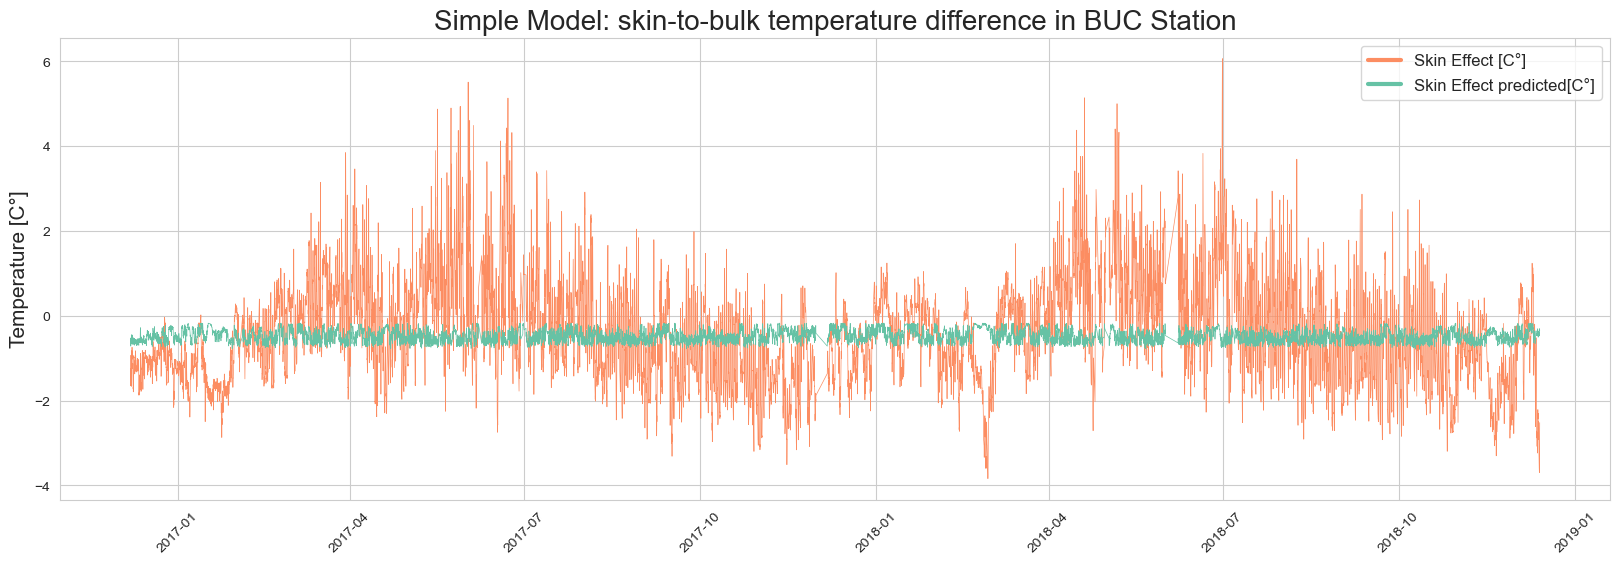

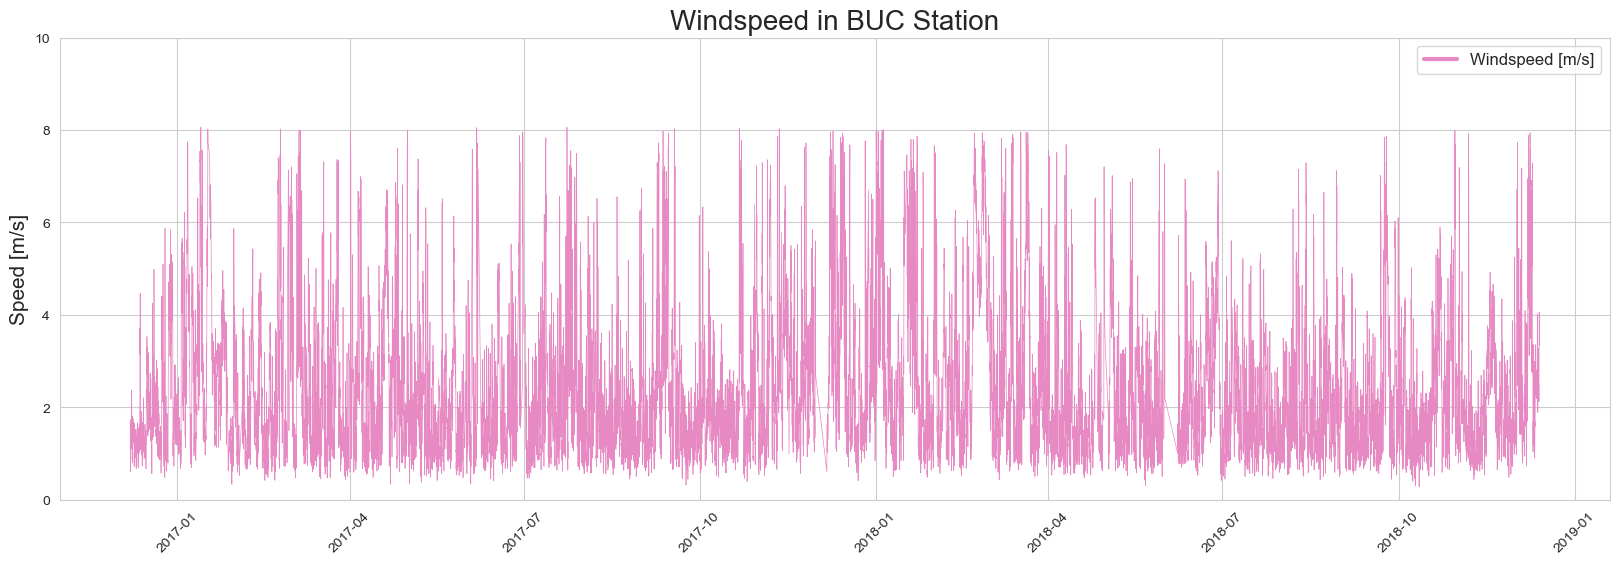

----------------------------------
Mean Squared Error: 3.2
R-squared score: -0.054
Adjusted R-squared score: -0.055
----------------------------------


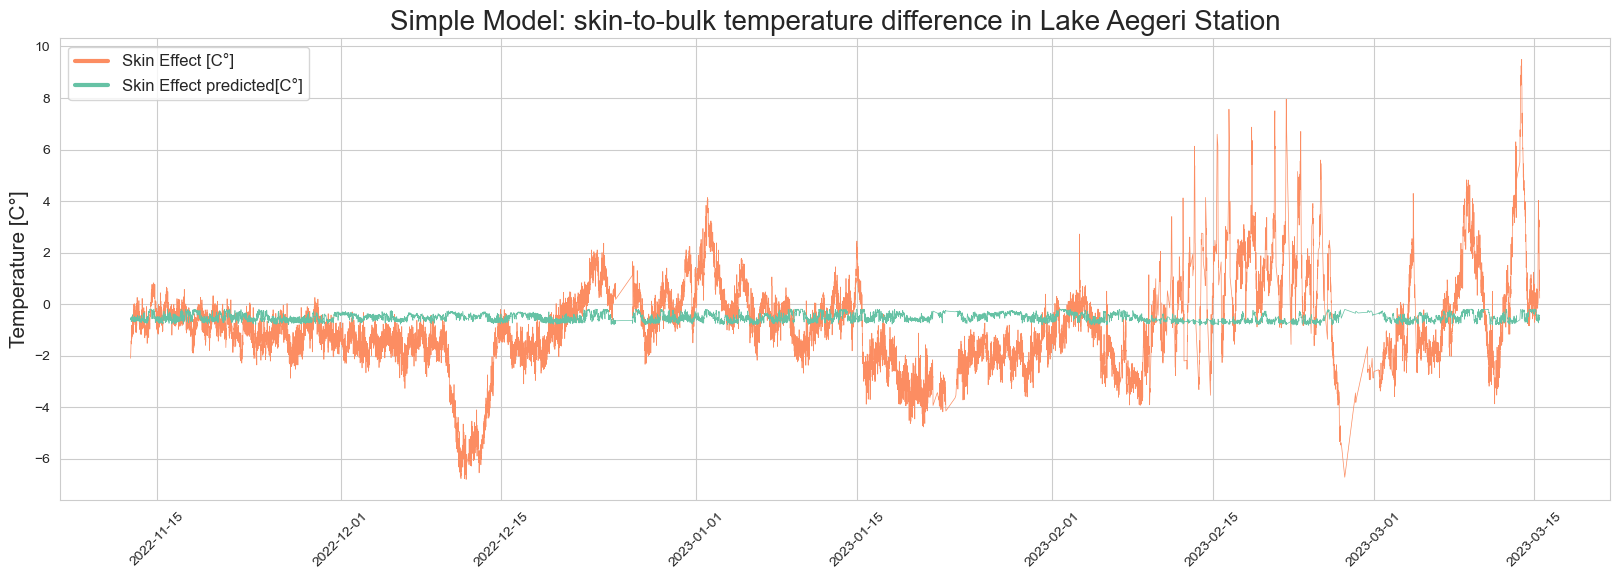

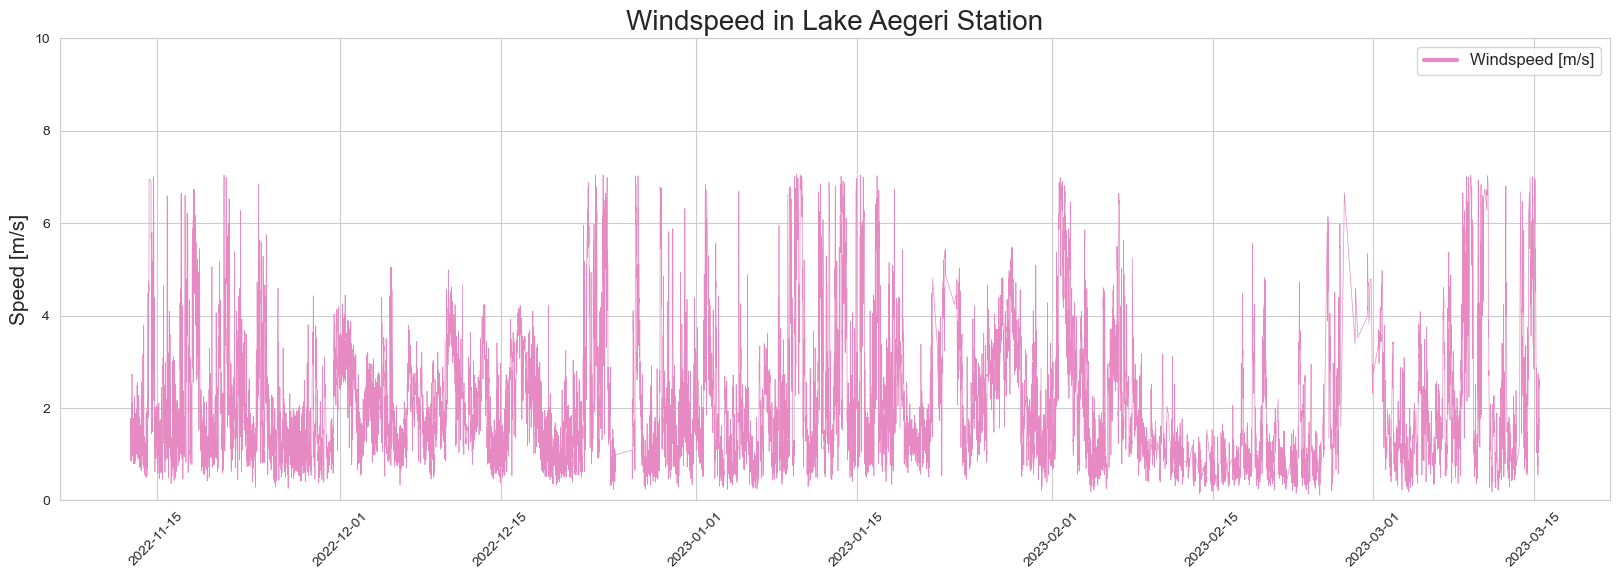

In [200]:
skin_effect(BUC_csv,"windspeed","bulk_temp","skin_temp","BUC Station")
skin_effect(LakeAegeri,"wind_speed","bulk_temp","skin_temp","Lake Aegeri Station")